# NETSET population notebook

population

In [119]:
import pandas as pd

In [120]:
dbpath='E:/Dropbox/Public/datarepo/netset/'

In [121]:
#https://esa.un.org/unpd/wpp/
pop=pd.read_excel(dbpath+'db/WPP2015_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.XLS',
                  skiprows=16).set_index('Major area, region, country or area *')

In [122]:
pop2=pop.set_index('Country code').drop(['Index','Variant','Notes'],axis=1)
pop=pop.drop(['Index','Variant','Notes','Country code'],axis=1)

In [123]:
wop=pd.read_excel(dbpath+'db/UN_PPP2015_Output_PopTot.xls',sheetname='Median',
                  skiprows=16).set_index('Major area, region, country or area')

In [124]:
wop2=wop.set_index('Country code').drop(['Index','Variant','Notes'],axis=1)
wop=wop.drop(['Index','Variant','Notes','Country code'],axis=1)

In [125]:
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style('onedork',context='notebook')
%matplotlib inline
import numpy as np

In [126]:
missingyears=[i for i in range(2015,2101) if i not in wop.columns]
for y in missingyears:
    wop[y]=np.NaN
wop=wop.sort_index(axis=1)
wop=wop.interpolate(method='linear' ,axis=1)
zop=pd.concat([pop,wop],axis=1)

In [127]:
missingyears=[i for i in range(2015,2101) if i not in wop2.columns]
for y in missingyears:
    wop2[y]=np.NaN
wop2=wop2.sort_index(axis=1)
wop2=wop2.interpolate(method='linear' ,axis=1)
zop2=pd.concat([pop2,wop2],axis=1)

In [151]:
#there are two 2015s
zop=zop.drop('2015',axis=1)

In [159]:
#add countries in all caps also in title caps
zot=zop.T
for i in zot.columns:
    if i.isupper(): 
        zot[i.title()]=zot[i]
zop=zot.T

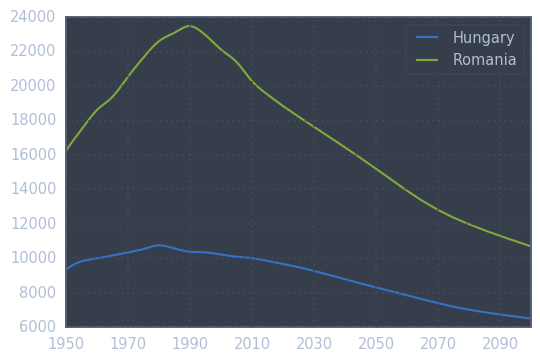

In [163]:
zop.loc[['Hungary','Romania']].T.plot();

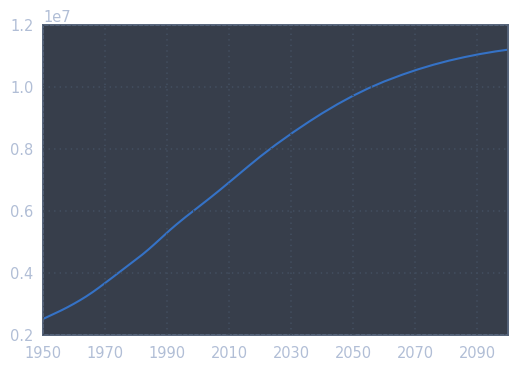

In [164]:
zop.loc['World'].plot();

In [165]:
file(dbpath+'db/pop.json','w').write(zop.to_json())
file(dbpath+'db/pop2.json','w').write(zop2.to_json())

In [166]:
file(dbpath+'db/pop.csv','w').write(zop.to_csv(encoding='utf-8'))
file(dbpath+'db/pop2.csv','w').write(zop2.to_csv(encoding='utf-8'))